In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os
import yaml
from PIL import Image

import torch
import torch.nn as nn

from net.basenet import GaussNet3, GaussianConv2d
from dataprocess.sirst import NUDTDataset, IRSTD1kDataset

In [ ]:
base_size = 128
pict = np.array(cv2.resize(cv2.imread('W:/DataSets/ISTD/IRSTD-1k/trainval/masks/XDU116.png', 0), [base_size, base_size], interpolation=cv2.INTER_LINEAR))
pict = np.array((pict, np.array(cv2.resize(cv2.imread('W:/DataSets/ISTD/IRSTD-1k/trainval/images/XDU116.png', 0), [base_size, base_size], interpolation=cv2.INTER_LINEAR))))
# pict = cv2.resize(pict, [2, 256, 256], interpolation=cv2.INTER_LINEAR)
pict = torch.from_numpy(pict).type(torch.float32)/255
# pict = pict.unsqueeze(0).view(2, 1, 240, 320)
# pict = pict[:,:,:,:240]
# pict = pict[:,:,:240]
print(pict.shape)

In [ ]:
net = GaussianConv2d(1, 3, 0.6)

In [ ]:
res = net(pict[1:2,])

print(net.atten.weight.data)
print(net.tempreture)
print(net.bias)

originp = np.array(pict)
# originp = (originp * 255).astype(np.uint8)
gaussp = res.detach().numpy()
gaussp = (gaussp - np.min(gaussp)) / (np.max(gaussp)-np.min(gaussp))
# gaussp = (gaussp * 255).astype(np.uint8)

# # 转换为PIL图像
# pil_image = Image.fromarray(gaussp[0, 0])

# # 保存图像
# pil_image.save("output4.png")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# plt.imshow(gaussp[0,0], cmap='gray')
axes[0].imshow(gaussp[0, 0], cmap='gray')
axes[0].axis('off')  # 关闭坐标轴显示
    
axes[1].imshow(originp[1], cmap='gray')
axes[1].axis('off')  # 同样关闭坐标轴显示
# plt.title('Blurred Image')
plt.tight_layout()
plt.show()

In [ ]:
import math

def gaussian_kernel(channel, kernel_size, sigma):
    """创建一个高斯核"""
    # 创建一个一维高斯核
    kernel_1d = torch.Tensor([math.exp(-z ** 2.0 / (2 * sigma ** 2)) for z in range(-kernel_size // 2 + 1, kernel_size // 2 + 1)])
    # 将一维高斯核扩展为二维
    kernel_2d = torch.outer(kernel_1d, kernel_1d)
    # 归一化
    kernel_2d /= kernel_2d.sum()
    kernel_2d[kernel_size // 2, kernel_size // 2] = -kernel_2d[kernel_size // 2, kernel_size // 2]
    # 整个卷积核参数
    params = torch.zeros((channel, channel, kernel_size, kernel_size))
    for i in range(channel):
        params[i, i] = kernel_2d
    return params

res = gaussian_kernel(1,3,0.6)
print(res)

In [ ]:
pt_path = "result/20240819T08-38-33_new_gauss2_1_irstd1k/best.pkl"
params = torch.load(pt_path)
# for key in params:
#     print(key)
for k in params:
    if "gauss.bias" in k:
        print(k)
        print(params[k])

In [ ]:
cfg_path = 'cfg.yaml'
with open(cfg_path) as f:
    cfg = yaml.safe_load(f)

net = GaussNet3(1, cfg)

In [ ]:
from torchvision import transforms

augment = transforms.Compose([
                    transforms.RandomAffine(degrees=180, translate=(0.1, 0.1), shear=0),
                ])

In [ ]:
a = np.array(cv2.imread("result/20240812T12-46-54_gauss9_1_irstd1k/nudt_result.png", 0))

In [ ]:
print(a.shape)

In [ ]:
import math
import torch
sigma = 2
kernel_size = 5

In [ ]:
def generate_gauss_kernel():
    kernel_size = 3
    sigma = 2

    kernels = []
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = torch.arange(0, kernel_size, 1, dtype=torch.float32) - i
            y = torch.arange(0, kernel_size, 1, dtype=torch.float32) - j
            kernel_1d_x = torch.exp(-(x**2) / (2 * sigma**2))
            kernel_1d_y = torch.exp(-(y**2) / (2 * sigma**2))
            kernel_2d = torch.outer(kernel_1d_x, kernel_1d_y)
            # 归一化
            kernel_2d /= kernel_2d.sum()
            kernels.append(kernel_2d)

    return kernels

result = generate_gauss_kernel()
for i in result:
    print(i)

In [1]:
from dataprocess.croped_sirst import Crop_IRSTD1kDataset
import yaml
import torch

cfg_path = 'cfg.yaml'
with open(cfg_path) as f:
    cfg = yaml.safe_load(f)
print(cfg["multiscalefeature_outchannel"])

dataset = Crop_IRSTD1kDataset(base_dir=r"W:/DataSets/ISTD/IRSTD-1k", mode="train", base_size=32)
# train_data_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, pin_memory=True)

[32, 48, 64, 96, 128]


In [3]:
i = 8
labels = []
datas = []
for data, label in dataset:
    i -= 1
    if i < 0:
        break
    labels.append(label.squeeze())
    datas.append(data.squeeze())

torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([ 7, 13])
torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([10,  3])
torch.Size([2, 8, 8])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([19, 14])
torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([10, 12])
torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([7, 7])
torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([0, 6])
torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([9, 8])
torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([10,  2])
torch.Size([2, 16, 16])
torch.Size([2, 32, 32])
torch.Size([32, 32])
tensor([6, 5])


(8, 32, 32)


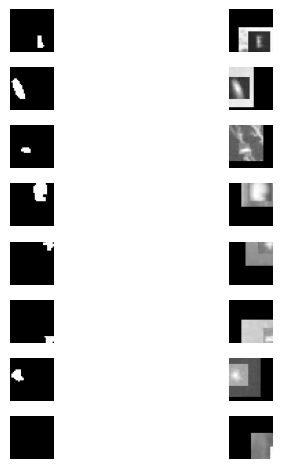

In [6]:
import numpy as np
import matplotlib.pyplot as plt

label = np.array(labels)
datas = np.array(datas)
print(datas.shape)
# originp = (originp * 255).astype(np.uint8)
# gaussp = res.detach().numpy()
# gaussp = (gaussp - np.min(gaussp)) / (np.max(gaussp)-np.min(gaussp))
# gaussp = (gaussp * 255).astype(np.uint8)

# # 转换为PIL图像
# pil_image = Image.fromarray(gaussp[0, 0])

# # 保存图像
# pil_image.save("output4.png")
row_num = label.shape[0]
fig, axes = plt.subplots(row_num, 2)
for i in range(row_num):
    # plt.imshow(gaussp[0,0], cmap='gray')
    axes[i, 0].imshow(label[i], cmap='gray')
    axes[i, 0].axis('off')  # 关闭坐标轴显示
        
    axes[i, 1].imshow(datas[i], cmap='gray')
    axes[i, 1].axis('off')  # 同样关闭坐标轴显示
    # plt.title('Blurred Image')
plt.tight_layout()
plt.show()

In [ ]:
print(multiscale_label[0])

In [ ]:
import torch
from net.twotasknet import Heatmap_net

# 1. 准备模型
model = Heatmap_net(1, cfg)
model.eval()  # 设置模型为评估模式

# 2. 定义输入形状
dummy_input = torch.randn(32, 1, 256, 256)  # 一个batch_size=1的示例输入

# 3. 导出模型 
torch.onnx.export(
    model,  # 模型实例
    dummy_input,  # 示例输入
    "heatmap_net.onnx",  # 输出文件名
    export_params=True,  # 存储模型参数 
    opset_version=17,  # ONNX版本
    do_constant_folding=True,  # 是否执行常量折叠优化
    input_names=['input'],  # 输入节点名称
    output_names=['output'],  # 输出节点名称
    dynamic_axes={'input': {0: 'batch_size'},  # 可变维度
                  'output': {0: 'batch_size'}}
)

In [1]:
from net.twotasknet import HeatMaptoImg
import torch

In [1]:
from net.twotasknet import TwoTaskNetWithLoss
from net.attentionnet import attenMultiplyUNet

import torch
import yaml

cfg_path = 'cfg.yaml'
with open(cfg_path) as f:
    cfg = yaml.safe_load(f)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [2]:
net = attenMultiplyUNet(cfg)
print(count_parameters(net))
# a = count_parameters(net.net_heatmap)
# print(a)
# b = count_parameters(net.net_localseg)
# print(b)

4427350


In [1]:
import torch

In [4]:
a = torch.randn((2,1))
print(a)
b = torch.randn((2,4))
print(b)
c = a * b
print(c)

tensor([[-0.6311],
        [ 0.5071]])
tensor([[ 0.7653, -0.2173,  1.6988,  0.1399],
        [ 0.9701, -0.9867,  0.0586,  1.1327]])
tensor([[-0.4830,  0.1371, -1.0721, -0.0883],
        [ 0.4919, -0.5003,  0.0297,  0.5743]])


In [4]:
data = torch.randn((2,1,8,8))
insert_data = torch.tensor([])

data2 = torch.concatenate((data, insert_data), dim=0)
print(data2)

tensor([[[[ 0.2945, -1.6937, -0.4777, -0.8346,  0.0160, -0.3761,  0.6503,
            0.4362],
          [-0.3471, -0.9358,  0.8630,  0.3979,  0.3385,  0.2603,  0.0579,
           -0.6900],
          [-0.5948,  0.1526, -1.1665,  0.8847,  0.7445,  0.8429,  0.4279,
           -0.3104],
          [-1.3352, -0.6949, -0.1322,  1.0315, -0.8240, -0.3998,  0.8544,
            0.4026],
          [-0.6897,  0.8612, -0.8703,  1.2025,  0.0348, -0.7983,  0.2408,
            1.7760],
          [ 0.2202,  0.6050,  0.3708, -0.5983, -0.5442, -0.1587,  0.4599,
           -0.7493],
          [-0.1097,  0.6814, -0.0685,  2.2017,  0.1956, -0.7722,  0.4304,
           -0.1054],
          [ 1.2892, -1.2722, -0.9184,  0.0404,  0.0147,  0.6385, -0.3078,
            0.6058]]],


        [[[-1.3255,  0.6792,  0.9170,  1.1509, -1.3670,  0.1873,  0.3723,
           -0.7406],
          [-0.4857, -0.5493, -0.7397, -2.0155,  0.1307,  0.3393, -0.2101,
           -0.0908],
          [ 2.2744,  0.5956, -1.2879,  0.9637,

In [1]:
from net.twotasknet import LocalSegment2

net = LocalSegment2(cfg)

In [2]:
print(count_parameters(net))

444705


In [7]:
input_data = torch.randn((8,1,32,32))
res = net(input_data)
print(res.shape)

torch.Size([8, 48, 3, 3]) torch.Size([8, 64, 2, 2])


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 3

In [1]:
import torch
import torch.nn as nn

from net.attentionnet import ConvDownSample

In [2]:
a = torch.randn((4,1,256,256))

net = ConvDownSample(1,1)

res = net(a)
print(res.shape)

torch.Size([4, 1, 128, 128])
